In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib.patches import RegularPolygon
import matplotlib.patches as mpatches
from matplotlib import cm
import numpy as np
from matplotlib import cm
from highlight_text import fig_text, ax_text
from ast import literal_eval

from mplsoccer import Pitch, VerticalPitch, lines

from PIL import Image
import urllib
import os
import glob
import os
from mplsoccer import add_image
from urllib.request import urlopen

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from matplotlib.colors import LinearSegmentedColormap

In [2]:
red = '#cb2217'
blue = '#00285e'
sky_blue = '#6caddf'
bg_color= '#fffcf7'
gold = '#ffc758'
plt.rcParams['font.family'] = 'DM Sans'

In [3]:
path = r'C:\Users\Hp2\Music\joel\Análisis de fulbo\WSL24-25' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [4]:
fotmob = pd.read_csv('fotmob.csv')
fotmob

club  fotmob_id
0               Chelsea FC Women     258661
1                  Arsenal Women     258657
2          Manchester City Women     231488
3              Aston Villa Women     231494
4        Manchester United Women     954396
5                  Everton Women     258663
6             Liverpool FC Women     258665
7        Crystal Palace FC Women     614828
8        Tottenham Hotspur Women     628117
9          West Ham United Women     231497
10  Brighton & Hove Albion Women     231505
11            Leicester City WFC     614954

In [5]:
df = pd.merge(left=df, right=fotmob, left_on='teamName', right_on='club', how='left')

In [6]:
#making my uefa data fit opta pitch dimensions
df['x'] = df['x']/1.05
df['y'] = df['y']/0.68
df['endX'] = df['endX']/1.05
df['endY'] = df['endY']/0.68
df['goalMouthY'] = df['goalMouthY']/0.68


In [7]:
data = df.loc[df['qualifiers'].str.contains('Cross') & ~df['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')]

In [8]:
data['is_assist'] = data['qualifiers'].str.contains('GoalAssist')
data['is_cross'] = data['qualifiers'].str.contains('Cross')

C:\Users\Hp2\AppData\Local\Temp\ipykernel_13248\3451069111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_assist'] = data['qualifiers'].str.contains('GoalAssist')
C:\Users\Hp2\AppData\Local\Temp\ipykernel_13248\3451069111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_cross'] = data['qualifiers'].str.contains('Cross')


In [9]:
data

level_0  index  eventId  minute  second  teamId     x     y  \
205         205    206     61.0    10.0    33.0   30998  95.8  91.2   
230         230    231     87.0    11.0    49.0   31010  80.0  14.1   
254         254    255     82.0    13.0    39.0   30998  82.0  80.3   
492         492    493    191.0    27.0    26.0   30998  84.1  15.5   
603         603    604    242.0    33.0    59.0   30998  87.1  14.3   
...         ...    ...      ...     ...     ...     ...   ...   ...   
236726     1000   1001    540.0    48.0    32.0   31006  98.4  76.3   
237005     1279   1280    668.0    64.0    56.0   31006  90.7  20.6   
237106     1380   1381    724.0    71.0    12.0   31006  94.0   2.9   
237267     1541   1542    822.0    78.0    20.0   31006  84.7  74.4   
237285     1559   1560    831.0    79.0     1.0   31006  98.3  72.6   

        expandedMinute      period  ...  prog_pass prog_carry  \
205               10.0   FirstHalf  ...  22.727862        0.0   
230               11.0   FirstHalf  ...  21.828643        0.0   
254               13.0   FirstHalf  ...  19.288493        0.0   
492               27.0   FirstHalf  ...  19.738436        0.0   
603               33.0   FirstHalf  ...  22.480137        0.0   
...                ...         ...  ...        ...        ...   
236726            52.0  SecondHalf  ...   6.018562        0.0   
237005            68.0  SecondHalf  ...  14.332225        0.0   
237106            75.0  SecondHalf  ...  21.904219        0.0   
237267            82.0  SecondHalf  ...  18.686768        0.0   
237285            83.0  SecondHalf  ... -18.900206        0.0   

       pass_or_carry_angle        shortName  possession_id  \
205             -91.415255        K. McCabe           15.0   
230              63.564483         C. Grant           18.0   
254             -40.561676  K. Cooney-Cross           19.0   
492              71.402976          B. Mead           37.0   
603              71.870642           E. Fox           43.0   
...                    ...              ...            ...   
236726          -92.037653         A. Csiki           61.0   
237005           84.371068        E. Morris           73.0   
237106           96.257995        D. Spence           81.0   
237267          -51.335521        A. Nilden           97.0   
237285          -93.772246           J. Naz           99.0   

                possession_team                     club  fotmob_id  \
205               Arsenal Women            Arsenal Women     258657   
230           Aston Villa Women        Aston Villa Women     231494   
254               Arsenal Women            Arsenal Women     258657   
492               Arsenal Women            Arsenal Women     258657   
603               Arsenal Women            Arsenal Women     258657   
...                         ...                      ...        ...   
236726  Tottenham Hotspur Women  Tottenham Hotspur Women     628117   
237005  Tottenham Hotspur Women  Tottenham Hotspur Women     628117   
237106  Tottenham Hotspur Women  Tottenham Hotspur Women     628117   
237267  Tottenham Hotspur Women  Tottenham Hotspur Women     628117   
237285  Tottenham Hotspur Women  Tottenham Hotspur Women     628117   

        is_assist  is_cross  
205         False      True  
230         False      True  
254         False      True  
492         False      True  
603         False      True  
...           ...       ...  
236726      False      True  
237005      False      True  
237106      False      True  
237267      False      True  
237285      False      True  

[3462 rows x 55 columns]

In [10]:
test_df = data[(data['teamName'] == 'Manchester United Women')]

### The Viz

We first do an example for Manchester City Women so we can replicate it for any team.

(-0.5, 191.5, 191.5, -0.5)

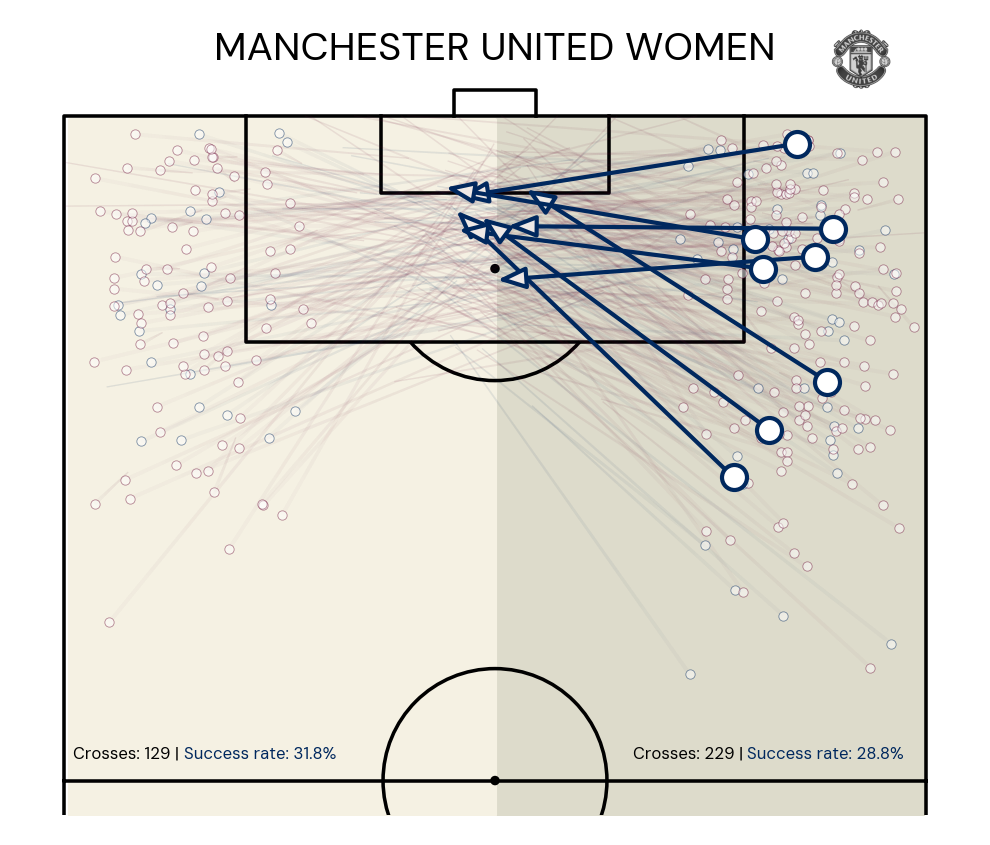

In [11]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='black',
    half=True
)
pitch.draw(ax = ax)

# -- Split successful corners from unsuccessful attempts.
assists = test_df[test_df['is_assist'] == True]
others = test_df[test_df['is_assist'] != True]
other_s = test_df[test_df['outcomeType'] == 'Successful']
other_u = test_df[test_df['outcomeType'] != 'Successful']

lines(other_s.y, other_s.x, other_s.endY, other_s.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color=blue)

lines(other_u.y, other_u.x, other_u.endY, other_u.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color='#70163C')

for index, a in assists.iterrows():
    # ax.plot([a['y'], a['end_y']], [a['x'], a['end_x']], lw=1, color='#307351')
    pass_arrow = mpatches.FancyArrowPatch((a.y, a.x), (a.endY, a.endX), ec=blue,
                                        fc='#efe9e6',arrowstyle='-|>,head_length=5.6,head_width=2.2', zorder=4)
    ax.add_patch(pass_arrow)

ax.scatter(assists['y'], assists['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=4)
ax.scatter(other_s['y'], other_s['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=3, alpha=.5, s=5, lw=0.2)
ax.scatter(other_u['y'], other_u['x'], marker='o', fc=ax.get_facecolor(), ec='#70163C', zorder=3, alpha=.5, s=5, lw=0.2)

# Separate left from right hand side
# -- Count which side had most crosses:
left_side = test_df[test_df['y'] > 50].shape[0]
right_side = test_df[test_df['y'] < 50].shape[0]
left_success = other_s[other_s['y'] > 50].shape[0]
right_success = other_s[other_s['y'] < 50].shape[0]

if right_side > left_side:
    color_left = '#F5F1E3'
    color_right = '#DDDBCB'
else:
    color_right = '#F5F1E3'
    color_left = '#DDDBCB'

ax.fill_between(
    x=[0.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_right, zorder=-1
)
ax.fill_between(
    x=[99.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_left, zorder=-1
)

# -- Annotations
ax_text(
    x=99, y=52,
    s=f'Crosses: {left_side:.0f} | <Success rate: {left_success/left_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':blue}],
    size=4,
    ax=ax
)

ax_text(
    x=34, y=52,
    s=f'Crosses: {right_side:.0f} | <Success rate: {right_success/right_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':blue}],
    size=4,
    ax=ax
)

ax.annotate(
    xy=(50,105),
    text=f"{test_df['teamName'].iloc[0].upper()}",
    size=9.5,
    color='black',
    ha='center',
    va='center',
    weight='bold',
    annotation_clip=False
)


# -- Add Logo
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((11,102))
ax_size = 0.05
image_ax = fig.add_axes(
    [ax_coords[0], ax_coords[1], ax_size, ax_size],
    fc='None'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{test_df["fotmob_id"].iloc[0]:.0f}.png')).convert('LA')
image_ax.imshow(club_icon)
image_ax.axis('off')

Now we turn it into a function.

In [12]:
def plot_crosses_by_team_name(ax, team_name):

    plot_df = data[(data['teamName'] == team_name)]

    pitch = VerticalPitch(
        pitch_type='opta',
        goal_type='box',
        linewidth=.85,
        line_color='black',
        half=True,
        pitch_color = bg_color
    )
    pitch.draw(ax = ax)

    # -- Split successful corners from unsuccessful attempts.
    assists = plot_df[plot_df['is_assist'] == True]
    others = plot_df[plot_df['is_assist'] != True]
    other_s = plot_df[plot_df['outcomeType'] == 'Successful']
    other_u = plot_df[plot_df['outcomeType'] != 'Successful']

    lines(other_s.y, other_s.x, other_s.endY, other_s.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color=blue)

    lines(other_u.y, other_u.x, other_u.endY, other_u.endX, 
        ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color='#70163C')

    for index, a in assists.iterrows():
        # ax.plot([a['y'], a['end_y']], [a['x'], a['end_x']], lw=1, color='#307351')
        pass_arrow = mpatches.FancyArrowPatch((a.y, a.x), (a.endY, a.endX), ec=blue,
                                            fc='#efe9e6',arrowstyle='-|>,head_length=5.6,head_width=2.2', zorder=4)
        ax.add_patch(pass_arrow)

    ax.scatter(assists['y'], assists['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=4)
    ax.scatter(other_s['y'], other_s['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=3, alpha=.5, s=5, lw=0.2)
    ax.scatter(other_u['y'], other_u['x'], marker='o', fc=ax.get_facecolor(), ec='#70163C', zorder=3, alpha=.5, s=5, lw=0.2)


    # Separate left from right hand side
    # -- Count which side had most crosses:
    left_side = plot_df[plot_df['y'] > 50].shape[0]
    right_side = plot_df[plot_df['y'] < 50].shape[0]
    left_success = other_s[other_s['y'] > 50].shape[0]
    right_success = other_s[other_s['y'] < 50].shape[0]

    if right_side > left_side:
        color_left = '#F5F1E3'
        color_right = '#DDDBCB'
    else:
        color_right = '#F5F1E3'
        color_left = '#DDDBCB'


    ax.fill_between(
        x=[0.35,50], y1=ax.get_ylim()[0], y2=99.65,
        color=color_right, zorder=-1
    )
    ax.fill_between(
        x=[99.35,50], y1=ax.get_ylim()[0], y2=99.65,
        color=color_left, zorder=-1
    )

    # -- Annotations
    ax_text(
        x=97, y=55,
        s=f'Crosses: {left_side:.0f}\n<Success (%): {left_success/left_side:.1%}>',
        ha='left', va='center',
        weight='bold', textalign='top',
        highlight_textprops=[{'color':'#307351'}],
        size=6,
        ax=ax
    )

    ax_text(
        x=36, y=55,
        s=f'Crosses: {right_side:.0f}\n<Success (%): {right_success/right_side:.1%}>',
        ha='left', va='center',
        weight='bold', textalign='top',
        highlight_textprops=[{'color':'#307351'}],
        size=7,
        ax=ax
    )

    ax.annotate(
        xy=(50,108),
        text=f"{plot_df['teamName'].iloc[0].upper()}",
        size=11.5,
        color='black',
        ha='center',
        va='center',
        weight='bold',
        annotation_clip=False
    )

    return ax

Finally we order the teams by the total number of crosses attempted.

In [13]:
order_teams = data.groupby(['teamName', 'fotmob_id'])['is_cross'].sum().reset_index().sort_values(by='is_cross', ascending=False).reset_index(drop=True)
order_teams

teamName  fotmob_id  is_cross
0               Chelsea FC Women     258661       376
1                  Arsenal Women     258657       375
2          Manchester City Women     231488       363
3        Manchester United Women     954396       358
4              Aston Villa Women     231494       317
5             Liverpool FC Women     258665       279
6        Tottenham Hotspur Women     628117       265
7        Crystal Palace FC Women     614828       255
8                  Everton Women     258663       253
9          West Ham United Women     231497       239
10  Brighton & Hove Albion Women     231505       198
11            Leicester City WFC     614954       184

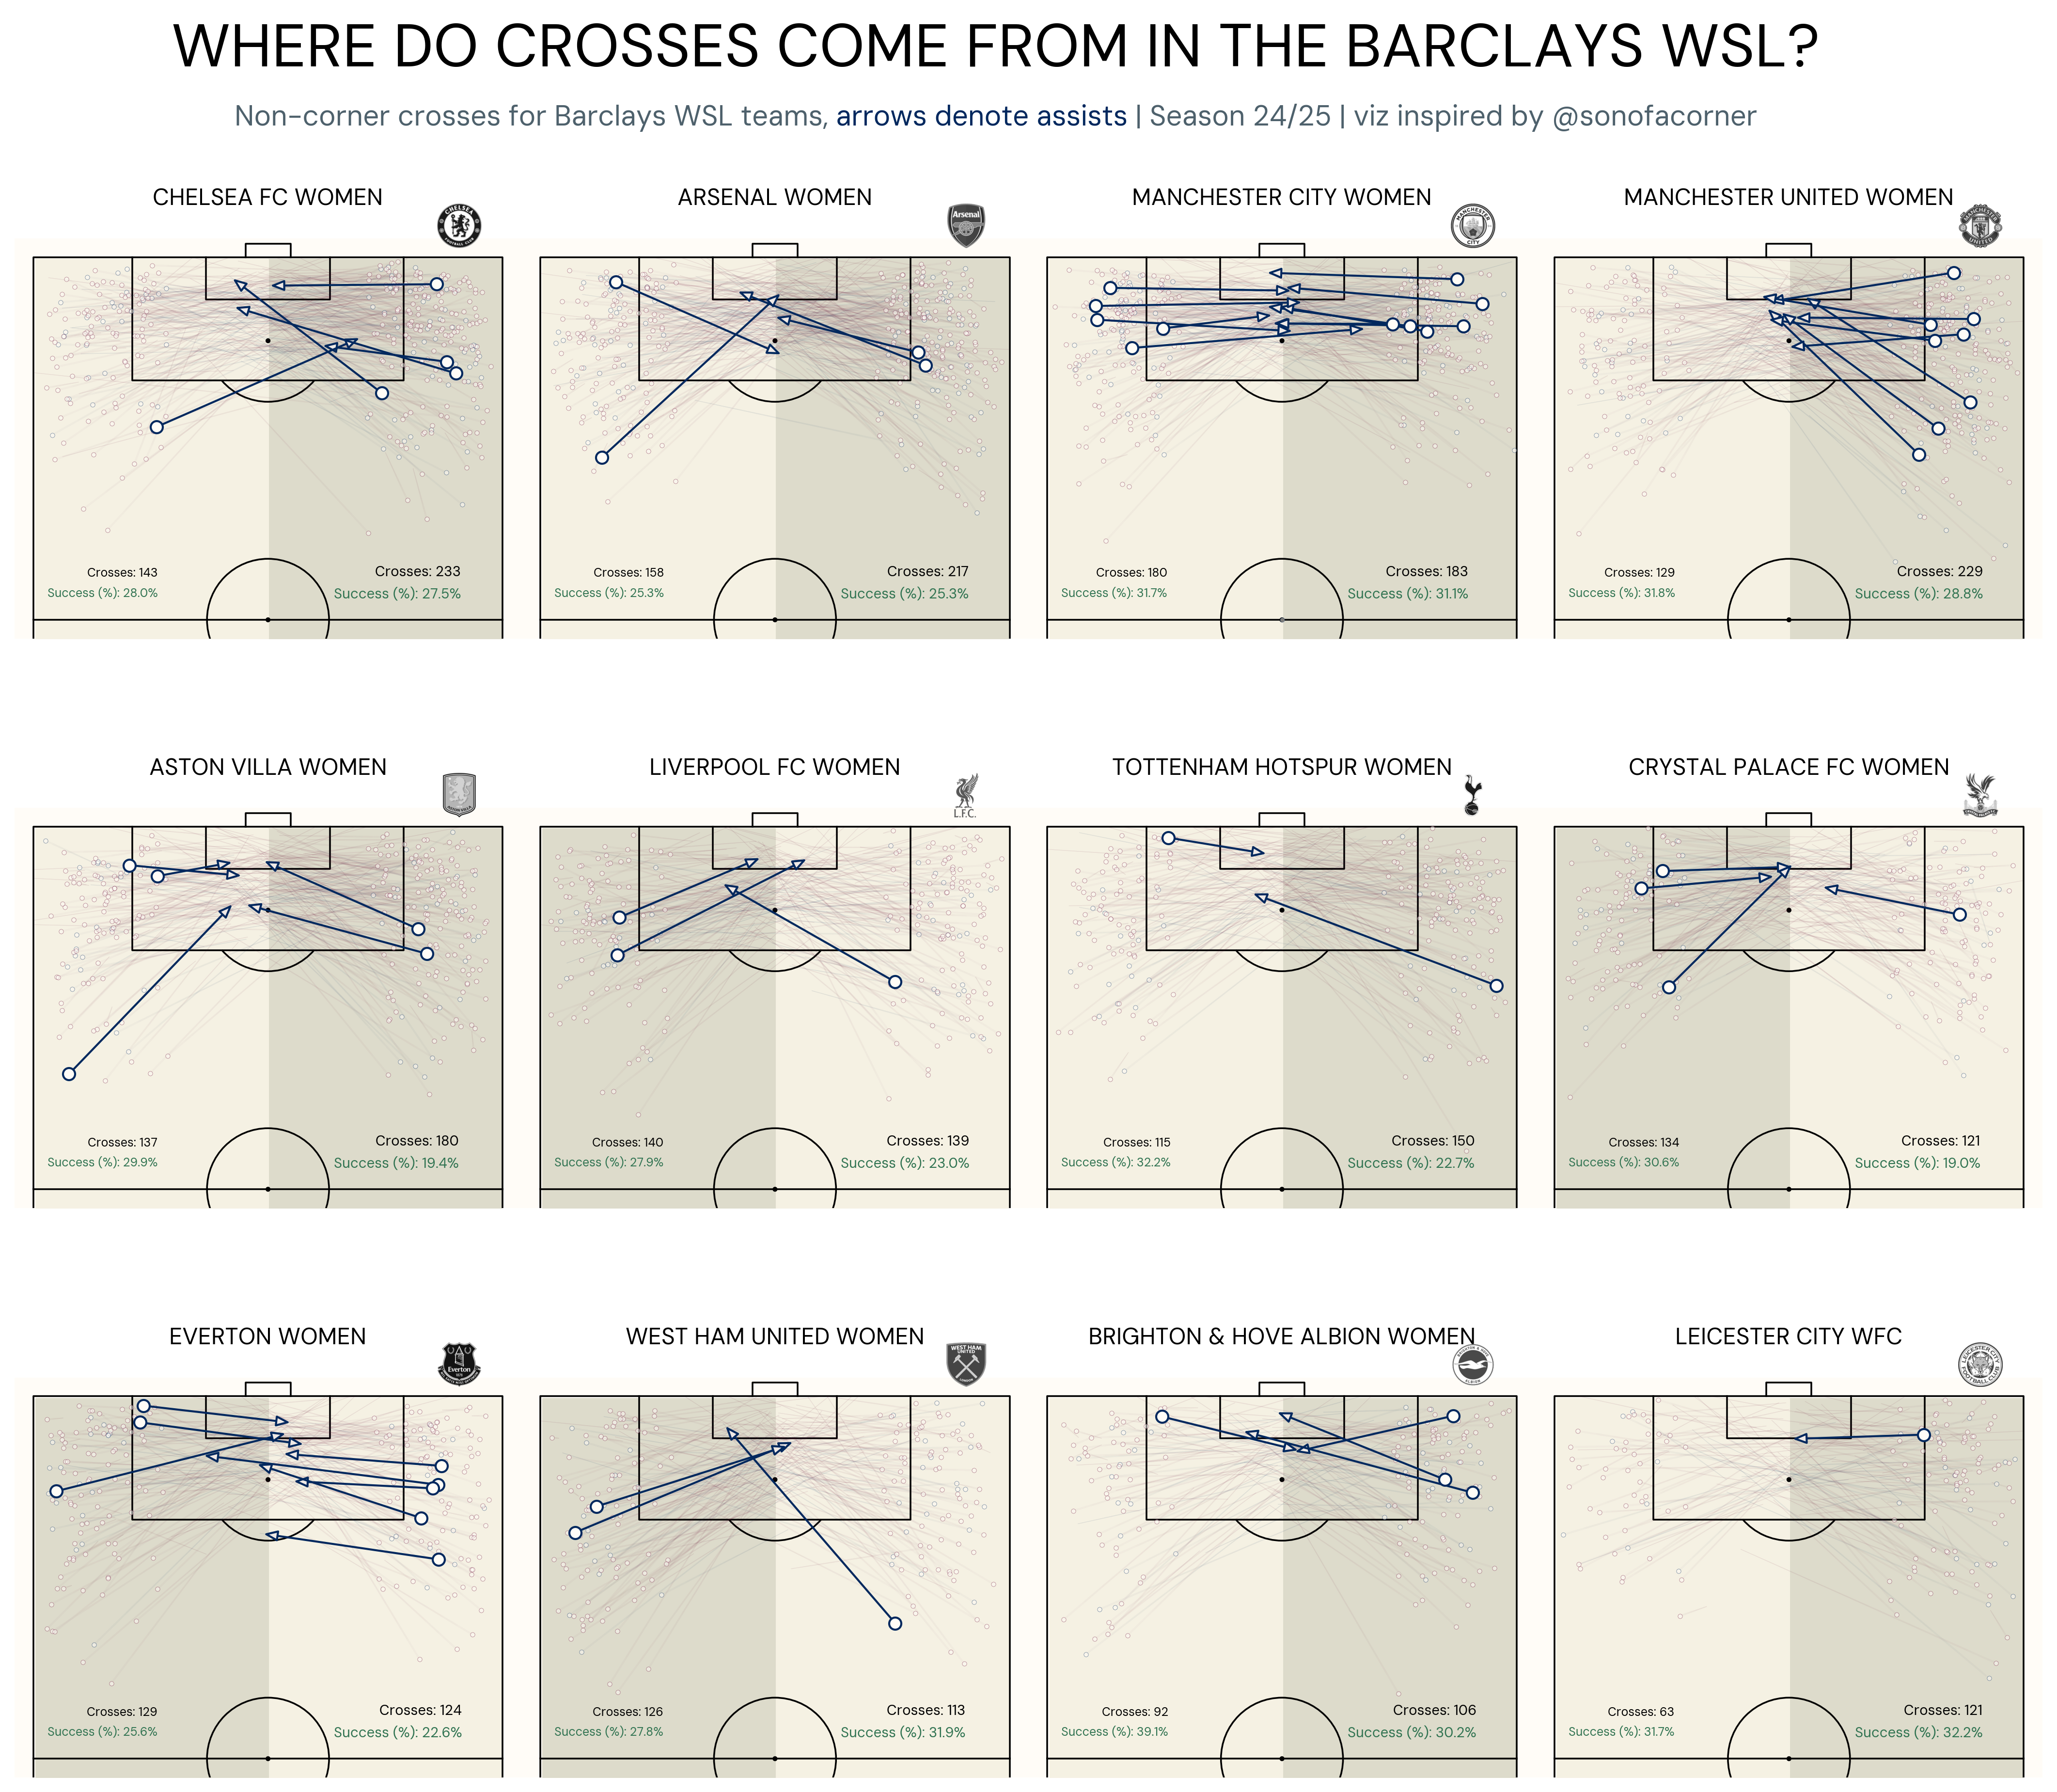

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18,18), dpi=300)
axs = np.array(axs)
for index, ax in enumerate(axs.reshape(-1)):
    plot_crosses_by_team_name(ax, order_teams['teamName'].iloc[index])

plt.subplots_adjust(wspace=0, hspace=-.35)
# We add the logos once we've reshaped the figure
for index, ax in enumerate(axs.reshape(-1)):
    # -- Transformation functions
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((14,87))
    ax_size = 0.017
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{order_teams["fotmob_id"].iloc[index]:.0f}.png')).convert('LA')
    image_ax.imshow(club_icon)
    image_ax.axis('off')



fig_text(
    x = 0.5, y = .85, 
    s = "WHERE DO CROSSES COME FROM IN THE BARCLAYS WSL?",
    va = "bottom", ha = "center",
    fontsize = 30, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.5, y = .83, 
    s = "Non-corner crosses for Barclays WSL teams, <arrows denote assists> | Season 24/25 | viz inspired by @sonofacorner",
    highlight_textprops=[{"weight": "bold", "color": blue}],
	va = "bottom", ha = "center",
	fontsize = 14, color = "#4E616C", font = "DM Sans"
)

plt.savefig(
	"10042025_wsl_crosses.png",
	dpi = 600,
	facecolor = bg_color,
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"10042025_wsl_crosses_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)

In [15]:
# PPDA
home_def_acts = df[(df['teamName']==hteamName) & (df['type'].str.contains('Interception|Foul|Challenge|BlockedPass|Tackle')) & (df['x']>35)]
away_def_acts = df[(df['teamName']==ateamName) & (df['type'].str.contains('Interception|Foul|Challenge|BlockedPass|Tackle')) & (df['x']>35)]
home_pass = df[(df['teamName']==hteamName) & (df['type']=='Pass') & (df['outcomeType']=='Successful') & (df['x']<70)]
away_pass = df[(df['teamName']==ateamName) & (df['type']=='Pass') & (df['outcomeType']=='Successful') & (df['x']<70)]
home_ppda = round((len(away_pass)/len(home_def_acts)), 2)
away_ppda = round((len(home_pass)/len(away_def_acts)), 2)

# Average Passes per Sequence
pass_df_home = df[(df['type'] == 'Pass') & (df['teamName']==hteamName)]
pass_counts_home = pass_df_home.groupby('possession_id').size()
PPS_home = pass_counts_home.mean().round()
pass_df_away = df[(df['type'] == 'Pass') & (df['teamName']==ateamName)]
pass_counts_away = pass_df_away.groupby('possession_id').size()
PPS_away = pass_counts_away.mean().round()

# Number of Sequence with 10+ Passes
possessions_with_10_or_more_passes = pass_counts_home[pass_counts_home >= 10]
pass_seq_10_more_home = possessions_with_10_or_more_passes.count()
possessions_with_10_or_more_passes = pass_counts_away[pass_counts_away >= 10]
pass_seq_10_more_away = possessions_with_10_or_more_passes.count()

NameError: name 'hteamName' is not defined

In [ ]:
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

h_colors=["#ffffff", "#6CABDD", "#1C2C5B"]
a_colors=["#ffffff", "#EF0107", "#DB0007"]

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "DM Sans"



def crosses(ax, col):
    cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=col, N=256
)
#     xT_table = df.groupby(['name','teamName'])['xT'].sum().reset_index()
#     xT_table = xT_table.sort_values(by="xT", ascending=False)
#     xT_table['xT'] = round(xT_table['xT'], 2)
    
#     xT = xT_table.loc[(xT_table['teamName'] == team_name) &( xT_table['xT'] > 0)]
    xT = order_teams.drop(columns=['fotmob_id'])
    xT.columns = ['Team', 'No. of Crosses']
    
    col_defs = [
    ColumnDefinition(
        name="Team",
        textprops={"ha": "left"},
        width=2.5
        ),
    ColumnDefinition(
        name="No. of Crosses",
        textprops={"ha": "center", "color": "#000000", "weight": "bold"},
        cmap = cmap
    )
    ]

#     fig, ax = plt.subplots(figsize=(7, 13))
    fig.set_facecolor(bg_color)
    ax.set_facecolor(bg_color)
    table = Table(
        xT,
        column_definitions=col_defs,
        index_col="Team",
        row_dividers=True,
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
        footer_divider=True,
        textprops={"fontsize": 14},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
        column_border_kw={"linewidth": 3, "linestyle": "-"},
    ).autoset_fontcolors(colnames=["Team", "No. of Crosses"]) # This will set the font color of the columns based on the cmap so the text is readable

#     plt.title('Number of Crosses in the WSL', size=18)
    


fig,axs=plt.subplots(figsize=(10,10), facecolor=bg_color)
xT_stats_home = crosses(ax, h_colors)


In [18]:
test_df = data[(data['shortName'] == 'M. Fowler')]

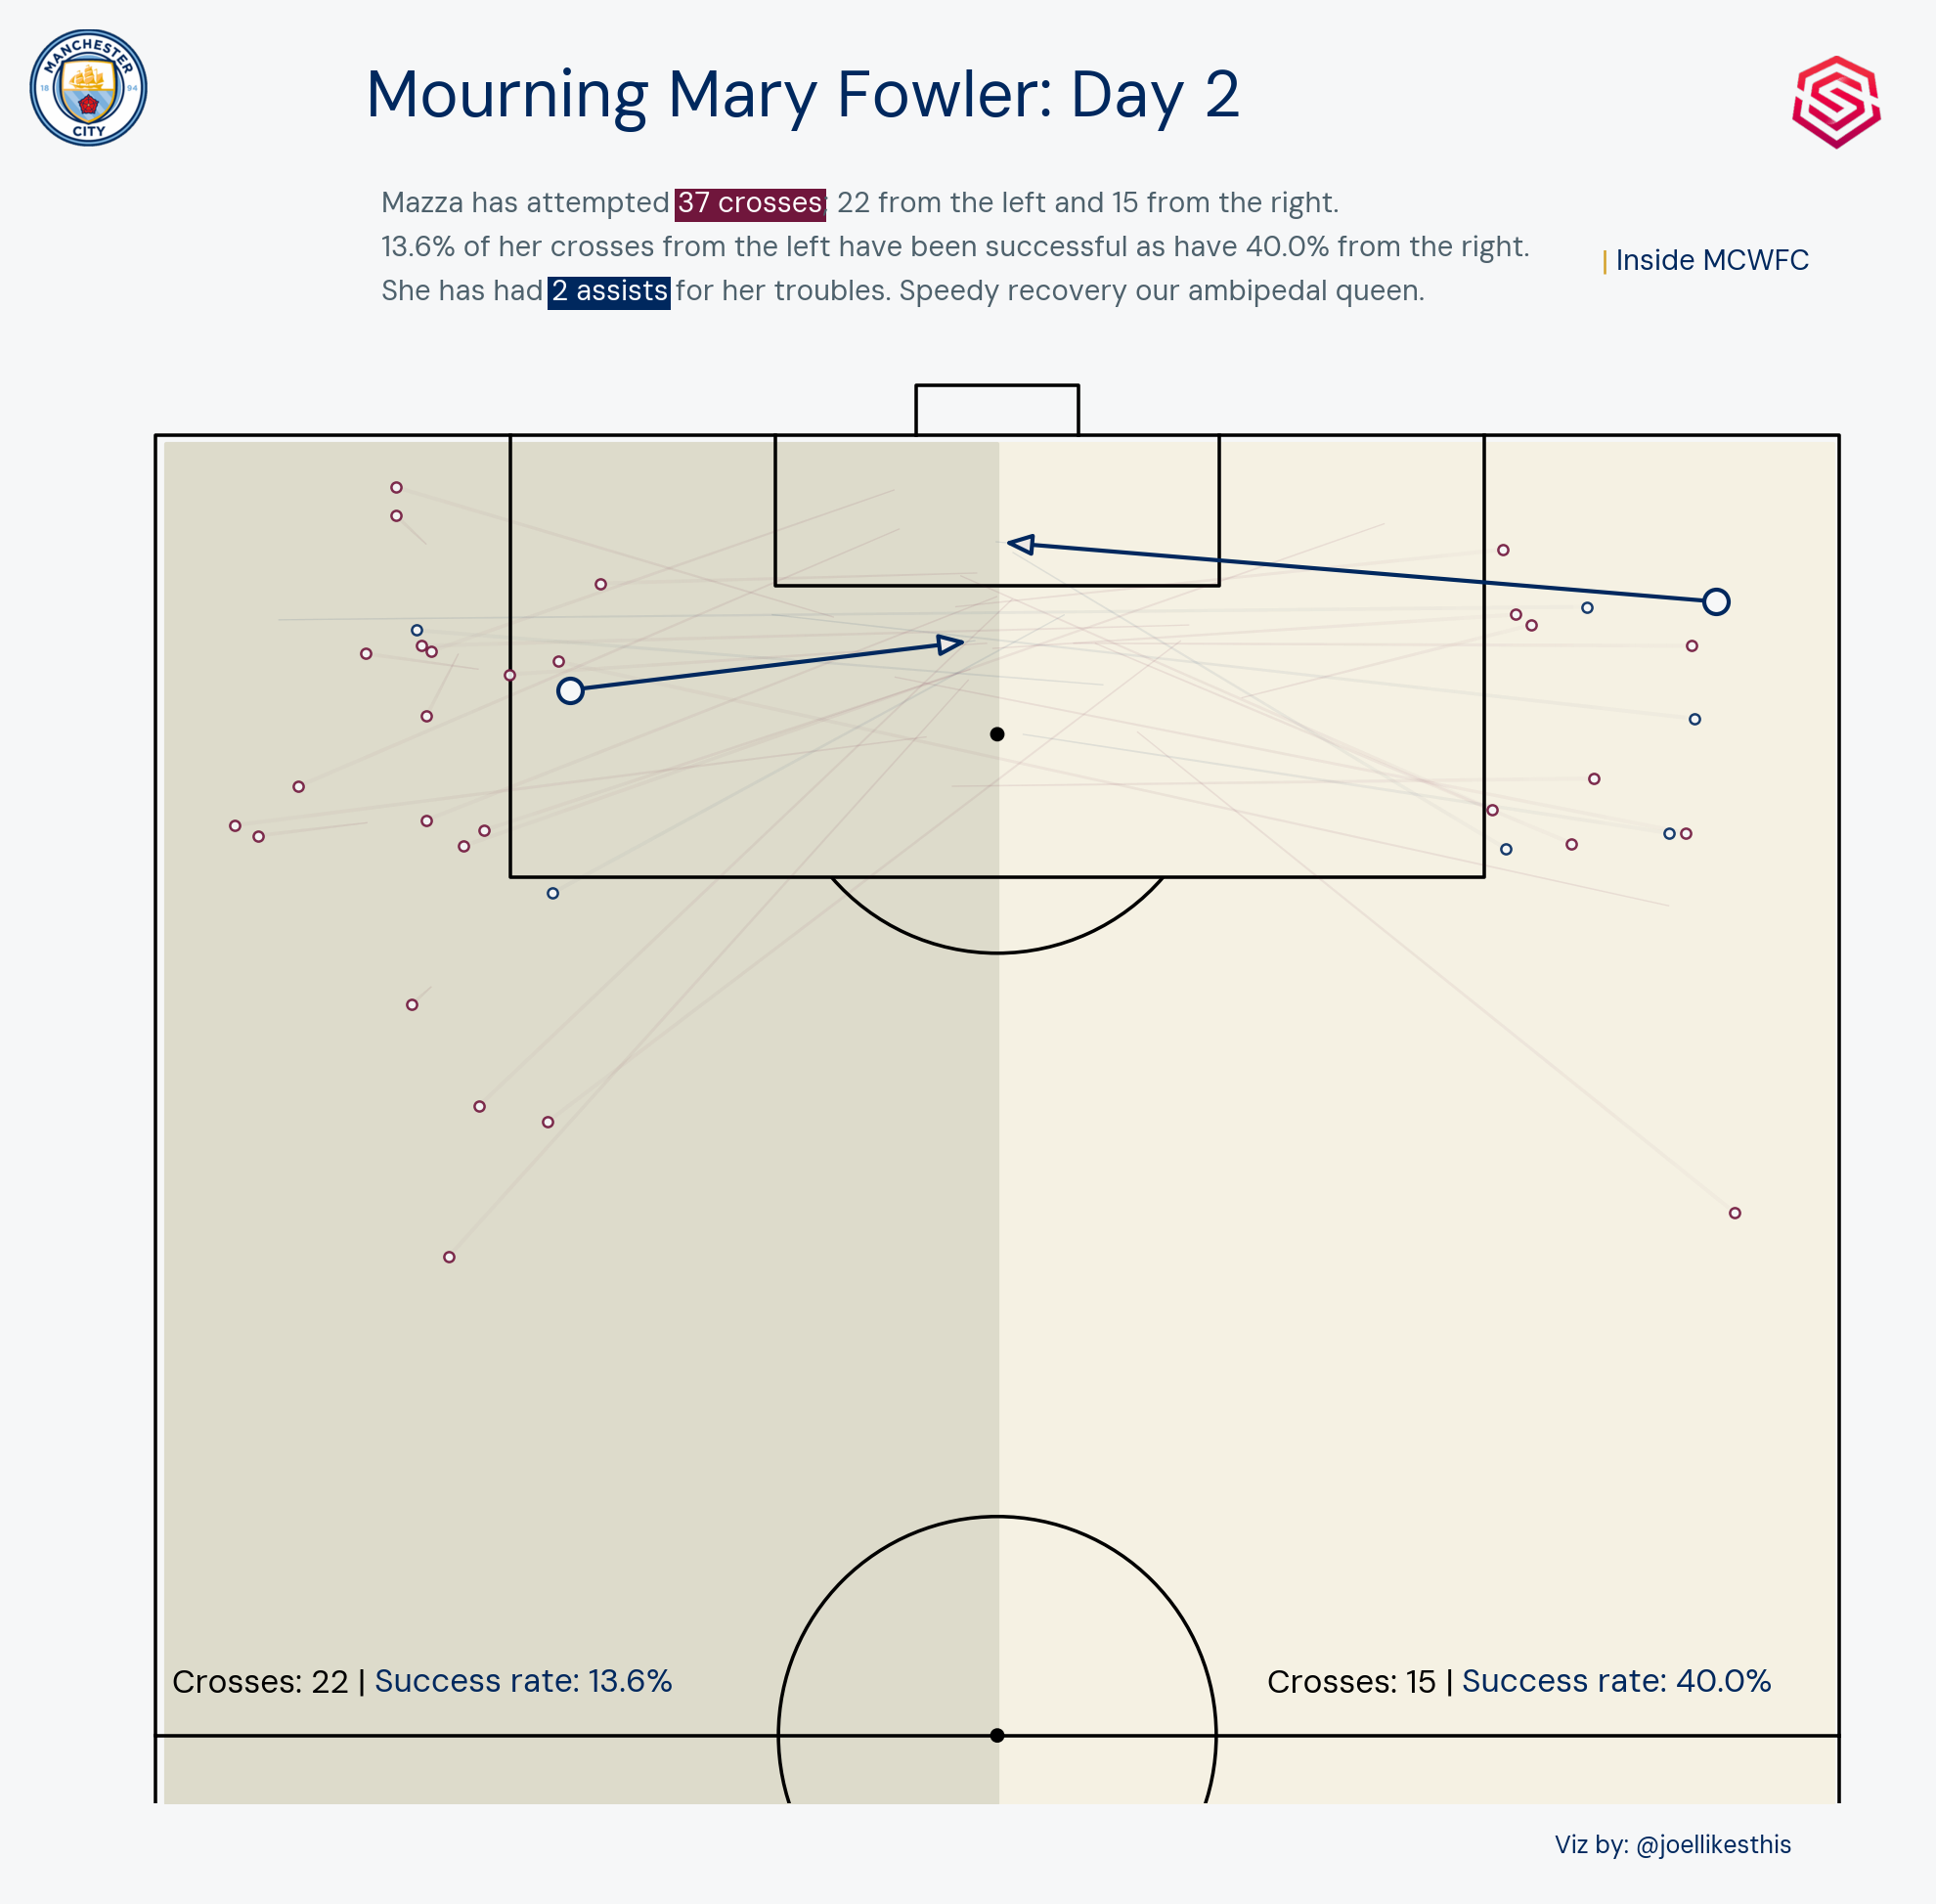

In [57]:
fig = plt.figure(figsize=(8,10), dpi=300, facecolor='#F6F7F8')
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='black',
    half=True,
    pitch_color='#F6F7F8'
)
pitch.draw(ax = ax)

bbox_pad = .8
bboxprops = {'linewidth': 0, 'pad': bbox_pad}


# -- Split successful corners from unsuccessful attempts.
assists = test_df[test_df['is_assist'] == True]
others = test_df[test_df['is_assist'] != True]
other_s = test_df[test_df['outcomeType'] == 'Successful']
other_u = test_df[test_df['outcomeType'] != 'Successful']

lines(other_s.y, other_s.x, other_s.endY, other_s.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color=blue)

lines(other_u.y, other_u.x, other_u.endY, other_u.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color='#70163C')

for index, a in assists.iterrows():
    # ax.plot([a['y'], a['end_y']], [a['x'], a['end_x']], lw=1, color='#307351')
    pass_arrow = mpatches.FancyArrowPatch((a.y, a.x), (a.endY, a.endX), ec=blue,
                                        fc='#efe9e6',arrowstyle='-|>,head_length=5.6,head_width=2.2', zorder=4)
    ax.add_patch(pass_arrow)

ax.scatter(assists['y'], assists['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=4)
ax.scatter(other_s['y'], other_s['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=3, alpha=.9, s=6, lw=0.6)
ax.scatter(other_u['y'], other_u['x'], marker='o', fc=ax.get_facecolor(), ec='#70163C', zorder=3, alpha=.9, s=6, lw=0.6)

# Separate left from right hand side
# -- Count which side had most crosses:
left_side = test_df[test_df['y'] > 50].shape[0]
right_side = test_df[test_df['y'] < 50].shape[0]
left_success = other_s[other_s['y'] > 50].shape[0]
right_success = other_s[other_s['y'] < 50].shape[0]

if right_side > left_side:
    color_left = '#F5F1E3'
    color_right = '#DDDBCB'
else:
    color_right = '#F5F1E3'
    color_left = '#DDDBCB'

ax.fill_between(
    x=[0.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_right, zorder=-1
)
ax.fill_between(
    x=[99.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_left, zorder=-1
)

# -- Annotations
ax_text(
    x=99, y=52,
    s=f'Crosses: {left_side:.0f} | <Success rate: {left_success/left_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':blue}],
    size=8,
    ax=ax
)

ax_text(
    x=34, y=52,
    s=f'Crosses: {right_side:.0f} | <Success rate: {right_success/right_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':blue}],
    size=8,
    ax=ax
)

str_text = f'''
Mazza has attempted <{left_side + right_side} crosses>; {left_side} from the left and {right_side} from the right.
{left_success/left_side:.1%} of her crosses from the left have been successful as have {right_success/right_side:.1%} from the right.
She has had <2 assists> for her troubles. Speedy recovery our ambipedal queen.
'''

        
fig_text(
    x = 0.43, y = .82, 
    s = "Mourning Mary Fowler: Day 2",
    va = "bottom", ha = "center",
    fontsize = 16, color = blue, weight = "bold"
)
fig_text(
	x = 0.25, y = .78, 
    s = str_text,
    highlight_textprops=[{'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':'#70163C', **bboxprops}},
                         {'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':blue, **bboxprops}},
                        ],

	va = "center",
	fontsize = 7, color = '#4E616C',
)

fig_text(
    x = 0.77, y = .78,
    s = "| <Inside MCWFC>",
    highlight_textprops = [
        {"color": blue, "weight": "bold"}
    ],
    color = "#D4A12A",
    size = 7,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.75, y = 0.24,
    s = "Viz by: @joellikesthis",
    color = blue,
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/9227.png'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}'))
ax_timage = add_image(club_icon, fig, left=0.85, bottom=0.81, width=0.040, height=0.040)

city_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/231488.png'
club_icon = Image.open(urllib.request.urlopen(f'{city_url}'))
ax_timage = add_image(club_icon, fig, left=0.1, bottom=0.81, width=0.050, height=0.050)